<a href="https://colab.research.google.com/github/daneshvar-amrollahi/UTKFace-Classification/blob/main/AI_CA5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!cp "/content/drive/MyDrive/CA5/UTKFace.tar.gz" .

In [182]:
!tar xvzf "UTKFace.tar.gz" > dataset_extract_log.txt

In [78]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorboard
import os

In [114]:
img_path = list()
Races = list()
file_names = list()

path = "/content/UTKFace"

for img in os.listdir(path):
  temp = img.split('.')

  if (len(temp[0].split('_')) == 4):
    img_path.append(os.path.join(path, img))
    Age, Gender, Race, Date = temp[0].split('_')
    file_names.append(temp[0] + '.' + temp[1])
    Races.append(int(Race))
  else:
    continue

classes_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Others"}
Races = [str(to_categorical(i, len(classes_labels))) for i in Races]

df = pd.DataFrame({
    'image': img_path,
    'Race': Races
})


In [115]:
file_names[:5]

['45_1_0_20170117135025030.jpg',
 '40_1_0_20170104183430557.jpg',
 '30_0_1_20170116010659651.jpg',
 '22_0_0_20170117193856707.jpg',
 '35_0_0_20170117193222963.jpg']

In [116]:
Races[:5]

['[1. 0. 0. 0. 0.]',
 '[1. 0. 0. 0. 0.]',
 '[0. 1. 0. 0. 0.]',
 '[1. 0. 0. 0. 0.]',
 '[1. 0. 0. 0. 0.]']

In [117]:
print(Races[0])
test = (Races[0][1:-1].split(' '))
print(test)
print(test.index('1.'))

[1. 0. 0. 0. 0.]
['1.', '0.', '0.', '0.', '0.']
0


In [82]:
y = [0] * 5
for data in Races:
  race_one_hot = (data[1:-1].split(' '))
  race = race_one_hot.index('1.')
  y[race] += 1

x = [0, 1, 2, 3, 4]

print("Count of each race:")
print(y)

Count of each race:
[10078, 4526, 3434, 3975, 1692]


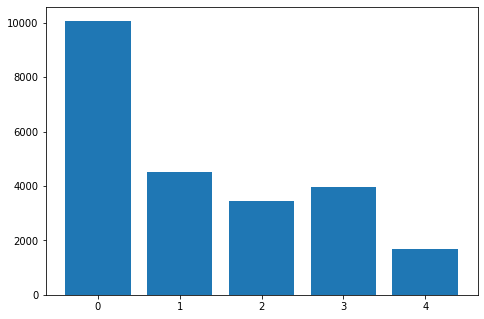

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.show()

In [84]:

white = Races.index('[1. 0. 0. 0. 0.]')
black = Races.index('[0. 1. 0. 0. 0.]')
asian = Races.index('[0. 0. 1. 0. 0.]')
indian = Races.index('[0. 0. 0. 1. 0.]')
other = Races.index('[0. 0. 0. 0. 1.]')


In [ ]:
!ls

drive  sample_data  UTKFace  UTKFace.tar.gz


In [85]:
print('/content/UTKFace/' + file_names[white])

/content/UTKFace/45_1_0_20170117135025030.jpg


In [186]:
from IPython import display
display.Image('/content/UTKFace/' + file_names[white])

In [87]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0, 
    validation_split = 0.3
)

In [118]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df, 
    x_col = 'image', 
    y_col = 'Race', 
    target_size = (100, 100), 
    color_mode = "grayscale",
    batch_size = 32, 
    class_mode = 'categorical', 
    subset = "training", 
    shuffle = False
)


Found 16594 validated image filenames belonging to 5 classes.


In [119]:
TestData = dataGenerator.flow_from_dataframe(
    dataframe = df, 
    x_col = 'image', 
    y_col = 'Race', 
    target_size = (100, 100), 
    color_mode = "grayscale",
    batch_size = 32, 
    class_mode = 'categorical', 
    subset = "validation", 
    shuffle = False
)



Found 7111 validated image filenames belonging to 5 classes.


In [120]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(5, activation = "softmax")(output)

In [121]:
model = models.Model(inputs = input, outputs = output)

In [122]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [123]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


### Initial Model

In [124]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 40ms/step - loss: 1.2813 - accuracy: 0.5031 - val_loss: 1.1451 - val_accuracy: 0.5510
Epoch 2/10
519/519 [==============================] - 20s 39ms/step - loss: 1.1154 - accuracy: 0.5825 - val_loss: 1.1352 - val_accuracy: 0.5806
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0374 - accuracy: 0.6185 - val_loss: 1.0613 - val_accuracy: 0.6050
Epoch 4/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9804 - accuracy: 0.6426 - val_loss: 0.9623 - val_accuracy: 0.6401
Epoch 5/10
519/519 [==============================] - 20s 39ms/step - loss: 0.9486 - accuracy: 0.6555 - val_loss: 0.9301 - val_accuracy: 0.6546
Epoch 6/10
519/519 [==============================] - 20s 39ms/step - loss: 0.9147 - accuracy: 0.6690 - val_loss: 0.9390 - val_accuracy: 0.6510
Epoch 7/10
519/519 [==============================] - 20s 39ms/step - loss: 0.8847 - accuracy: 0.6766 - val_loss: 0.8974 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


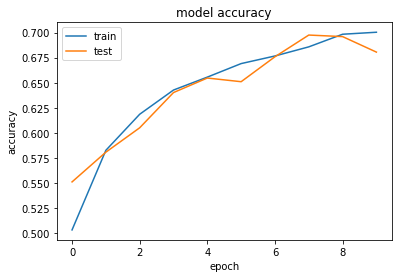

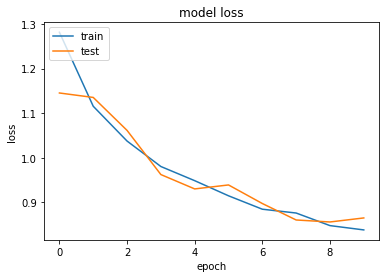

In [125]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

519/519 [==============================] - 15s 29ms/step


#### Train Data Results (Momentum = 0)

In [171]:
y_pred = model.predict(TrainData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TrainData.labels)

print(classification_report(y_true, y_pred_bool))

519/519 [==============================] - 15s 30ms/step
              precision    recall  f1-score   support

           0       0.50      0.00      0.01      1177
           1       0.76      0.42      0.54      2789
           2       0.84      0.55      0.66      2378
           3       0.81      0.78      0.79      3192
           4       0.64      0.94      0.76      7058

    accuracy                           0.70     16594
   macro avg       0.71      0.54      0.55     16594
weighted avg       0.71      0.70      0.66     16594



#### Test Data Results (Momentum = 0)

In [172]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 7s 29ms/step
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       515
           1       0.72      0.40      0.51      1186
           2       0.81      0.53      0.64      1056
           3       0.78      0.76      0.77      1334
           4       0.63      0.92      0.75      3020

    accuracy                           0.68      7111
   macro avg       0.65      0.52      0.53      7111
weighted avg       0.68      0.68      0.64      7111



## Momentum

**Momentum** or **SGD with momentum** is a method which helps accelerate gradients vectors in the right directions, thus leading to faster converging in compare to stochastic gradient descent.
A momentum, is a moving average of our gradients. We then use it to update the weight of the network. Here is how the weights are updated using momentum:


$$velocity = momentum * velocity - learningRate * g$$
$$w = w + velocity$$

It considers the amount of weight increment in the previous iteration as well. Thus, if the optimization algorithm is moving in a general direction, the momentum causes it to ‘resist’ changes in direction.

A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step

### Momentum = 0.5

In [198]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [199]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 23s 43ms/step - loss: 0.6640 - accuracy: 0.7671 - val_loss: 0.7860 - val_accuracy: 0.7289
Epoch 2/10
519/519 [==============================] - 22s 43ms/step - loss: 0.6616 - accuracy: 0.7670 - val_loss: 0.8134 - val_accuracy: 0.7254
Epoch 3/10
519/519 [==============================] - 22s 42ms/step - loss: 0.6610 - accuracy: 0.7671 - val_loss: 0.8535 - val_accuracy: 0.7054
Epoch 4/10
519/519 [==============================] - 22s 42ms/step - loss: 0.6586 - accuracy: 0.7680 - val_loss: 0.7939 - val_accuracy: 0.7282
Epoch 5/10
519/519 [==============================] - 22s 42ms/step - loss: 0.6570 - accuracy: 0.7693 - val_loss: 0.8152 - val_accuracy: 0.7270
Epoch 6/10
519/519 [==============================] - 22s 42ms/step - loss: 0.6585 - accuracy: 0.7680 - val_loss: 0.7981 - val_accuracy: 0.7290
Epoch 7/10
519/519 [==============================] - 22s 42ms/step - loss: 0.6538 - accuracy: 0.7684 - val_loss: 0.7932 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


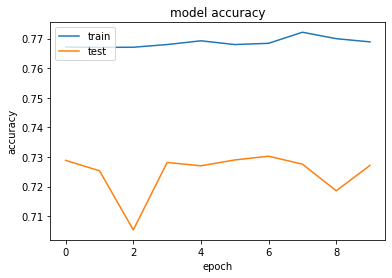

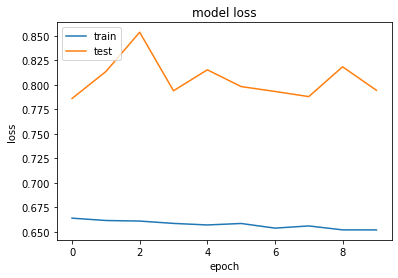

In [200]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [201]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 7s 29ms/step
              precision    recall  f1-score   support

           0       0.33      0.07      0.11       515
           1       0.64      0.65      0.65      1186
           2       0.75      0.75      0.75      1056
           3       0.79      0.76      0.77      1334
           4       0.74      0.85      0.79      3020

    accuracy                           0.73      7111
   macro avg       0.65      0.61      0.61      7111
weighted avg       0.70      0.73      0.71      7111



#### As it can be seen, there is a 10% increase in accuracy when momentum is set to 0.5 in compare to the previous case which momentum was 0.

### Momentum = 0.9

In [202]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [203]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 22s 42ms/step - loss: 0.7766 - accuracy: 0.7290 - val_loss: 0.9129 - val_accuracy: 0.6884
Epoch 2/10
519/519 [==============================] - 22s 43ms/step - loss: 0.7677 - accuracy: 0.7338 - val_loss: 0.8558 - val_accuracy: 0.7050
Epoch 3/10
519/519 [==============================] - 22s 43ms/step - loss: 0.7622 - accuracy: 0.7351 - val_loss: 0.8388 - val_accuracy: 0.7168
Epoch 4/10
519/519 [==============================] - 22s 42ms/step - loss: 0.7652 - accuracy: 0.7335 - val_loss: 0.8730 - val_accuracy: 0.7050
Epoch 5/10
519/519 [==============================] - 22s 43ms/step - loss: 0.7483 - accuracy: 0.7390 - val_loss: 0.9292 - val_accuracy: 0.6759
Epoch 6/10
519/519 [==============================] - 22s 42ms/step - loss: 0.7674 - accuracy: 0.7317 - val_loss: 0.8079 - val_accuracy: 0.7314
Epoch 7/10
519/519 [==============================] - 22s 42ms/step - loss: 0.7545 - accuracy: 0.7377 - val_loss: 0.8201 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


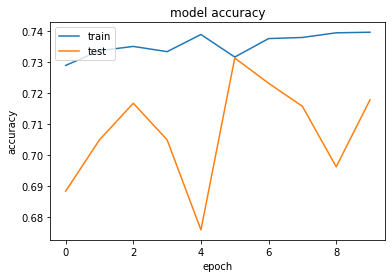

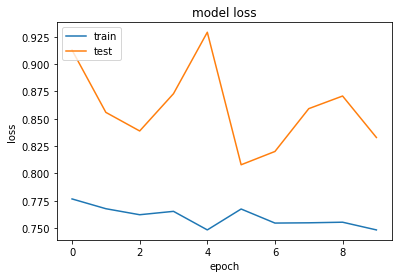

In [204]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

#### It is pretty obvious that the **momentum factor** is too large and it is skipping the minimum point.

In [205]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 7s 30ms/step
              precision    recall  f1-score   support

           0       0.29      0.03      0.06       515
           1       0.72      0.51      0.59      1186
           2       0.71      0.79      0.75      1056
           3       0.80      0.74      0.77      1334
           4       0.70      0.88      0.78      3020

    accuracy                           0.72      7111
   macro avg       0.64      0.59      0.59      7111
weighted avg       0.69      0.72      0.69      7111



### Results Compared:

X                  | Momentum = 0 | Momentum = 0.5 | Momentum = 0.9 |
-------------------|--------------|----------------|----------------|
Accuracy           | 68%          |         80%    |          73%   |

A too large momentum value might cause the algorithm to jump over the minimum value with a huge step.

## Adam Optimizer

In [206]:
model.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [207]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 23s 44ms/step - loss: 0.7540 - accuracy: 0.7344 - val_loss: 0.8164 - val_accuracy: 0.7206
Epoch 2/10
519/519 [==============================] - 22s 43ms/step - loss: 0.7298 - accuracy: 0.7415 - val_loss: 0.9780 - val_accuracy: 0.6681
Epoch 3/10
519/519 [==============================] - 22s 43ms/step - loss: 0.7272 - accuracy: 0.7428 - val_loss: 0.7957 - val_accuracy: 0.7245
Epoch 4/10
519/519 [==============================] - 22s 43ms/step - loss: 0.7257 - accuracy: 0.7464 - val_loss: 0.8040 - val_accuracy: 0.7269
Epoch 5/10
519/519 [==============================] - 22s 42ms/step - loss: 0.7147 - accuracy: 0.7476 - val_loss: 0.8348 - val_accuracy: 0.7103
Epoch 6/10
519/519 [==============================] - 22s 42ms/step - loss: 0.7120 - accuracy: 0.7485 - val_loss: 0.9103 - val_accuracy: 0.6937
Epoch 7/10
519/519 [==============================] - 22s 42ms/step - loss: 0.7067 - accuracy: 0.7521 - val_loss: 0.8808 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


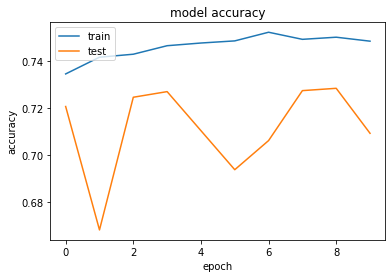

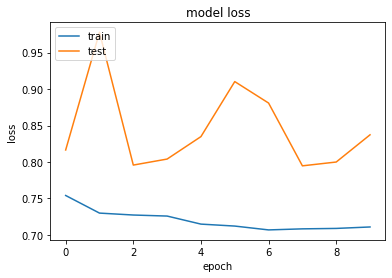

In [208]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [209]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 6s 29ms/step
              precision    recall  f1-score   support

           0       0.36      0.03      0.06       515
           1       0.58      0.68      0.63      1186
           2       0.72      0.78      0.75      1056
           3       0.87      0.60      0.71      1334
           4       0.72      0.86      0.78      3020

    accuracy                           0.71      7111
   macro avg       0.65      0.59      0.59      7111
weighted avg       0.70      0.71      0.69      7111



The Adam optimizer isn't resulting as well as the SGD Momentum optimizer.

## Epochs

In [211]:
model.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [212]:
history = model.fit(TrainData, validation_data = TestData, epochs = 20)

Epoch 1/20
519/519 [==============================] - 23s 43ms/step - loss: 0.6902 - accuracy: 0.7553 - val_loss: 0.8391 - val_accuracy: 0.7085
Epoch 2/20
519/519 [==============================] - 22s 43ms/step - loss: 0.7132 - accuracy: 0.7480 - val_loss: 0.8530 - val_accuracy: 0.7016
Epoch 3/20
519/519 [==============================] - 22s 43ms/step - loss: 0.6924 - accuracy: 0.7562 - val_loss: 0.8021 - val_accuracy: 0.7270
Epoch 4/20
519/519 [==============================] - 22s 42ms/step - loss: 0.6876 - accuracy: 0.7558 - val_loss: 0.8395 - val_accuracy: 0.7074
Epoch 5/20
519/519 [==============================] - 22s 43ms/step - loss: 0.6886 - accuracy: 0.7599 - val_loss: 0.8262 - val_accuracy: 0.7114
Epoch 6/20
519/519 [==============================] - 22s 43ms/step - loss: 0.6817 - accuracy: 0.7597 - val_loss: 0.8169 - val_accuracy: 0.7148
Epoch 7/20
519/519 [==============================] - 22s 43ms/step - loss: 0.6877 - accuracy: 0.7572 - val_loss: 0.8149 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


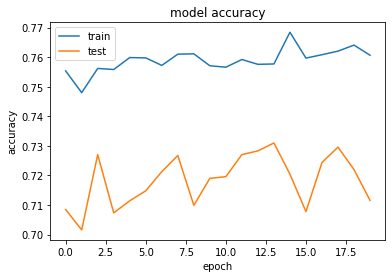

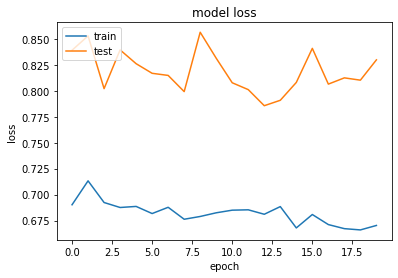

In [213]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [214]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 7s 29ms/step
              precision    recall  f1-score   support

           0       0.32      0.10      0.15       515
           1       0.51      0.81      0.63      1186
           2       0.84      0.69      0.76      1056
           3       0.80      0.72      0.76      1334
           4       0.79      0.78      0.78      3020

    accuracy                           0.71      7111
   macro avg       0.65      0.62      0.62      7111
weighted avg       0.72      0.71      0.70      7111



##### Increasing the number of epochs might lead to overfitting. This can be determined if the model is fitting much better on the train data in compare to the test data. This can be determined by looking at plots above. If there is a significant difference in the train accuracy and test accuracy, probably overfitting has happened.

##### Therefore, using a higher number of epochs isn't always a good idea.


##### We should try different epoch sizes to prevent both underfitting and overfitting.